### Antimicrobial Peptide Predictor

In this notebook we will create a classifier to predict the antimicrobial activity of pepitides. To do this we will need to calculate first the properties of the aminoacids from the peptides how strong is this antimicrobial activity. 

**What are peptides?**: Peptides are short stretches of aminoacid chains. In other words, aminoacids may be link themselves into chains from 2 up to 50 links, this whole chain of aminoacids is called peptides.

Datasets available at: https://cbbio.online/AxPEP/?action=dataset

#### **Installing Conda, Pfeature and CD-Hit libraries**

**PFeature** is an external library focused on bioinformatics that help us to compute the properties of aminoacids, and consequently quantifying the molecular properties of those peptides like in the drug discovery project. We need to download, unzip, and install manually.

**CD-Hit** is another external library based in bioconda package (that's why we need to install conda), that will allow us to filter reundancies in the peptides, hence similar peptides will be discarded retriving only a unique subset of that peptide family.

In [20]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-06-26 14:50:52--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   147MB/s    in 0.6s    

2021-06-26 14:50:52 (147 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6

In [21]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

--2021-06-26 14:51:02--  https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip [following]
--2021-06-26 14:51:02--  https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 511222 (499K) [application/zip]
Saving to: ‘Pfeature.zip’

Pfeature.zip        100%[===================>] 499.24K  --.-KB/s    in 0.04s   

2021-06-26 14:51:02 (11.9 MB/s) - ‘Pfeature.zip’ saved [511222/511222]



In [22]:
! unzip Pfeature.zip

Archive:  Pfeature.zip
  inflating: __MACOSX/._Pfeature     
  inflating: Pfeature/PKG-INFO       
  inflating: __MACOSX/Pfeature/._PKG-INFO  
  inflating: Pfeature/.DS_Store      
  inflating: __MACOSX/Pfeature/._.DS_Store  
  inflating: Pfeature/README         
  inflating: __MACOSX/Pfeature/._README  
  inflating: Pfeature/setup.py       
  inflating: __MACOSX/Pfeature/._setup.py  
  inflating: Pfeature/Functions_Tables.pdf  
  inflating: __MACOSX/Pfeature/._Functions_Tables.pdf  
   creating: Pfeature/build/
  inflating: __MACOSX/Pfeature/._build  
  inflating: Pfeature/Pfeature_Descriptors.pdf  
  inflating: __MACOSX/Pfeature/._Pfeature_Descriptors.pdf  
   creating: Pfeature/Pfeature/
  inflating: __MACOSX/Pfeature/._Pfeature  
   creating: Pfeature/build/lib/
  inflating: __MACOSX/Pfeature/build/._lib  
  inflating: Pfeature/Pfeature/bonds.csv  
  inflating: Pfeature/Pfeature/pfeature.py  
  inflating: Pfeature/Pfeature/AAIndexNames.csv  
  inflating: Pfeature/Pfeature/aaindices

In [23]:
% cd Pfeature

/content/Pfeature/Pfeature


In [24]:
! python setup.py install

/usr/local/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'zip_safe'
  warnings.warn(msg)
running install
running build
running build_py
copying Pfeature/__init__.py -> build/lib/Pfeature
copying Pfeature/pfeature.py -> build/lib/Pfeature
running install_lib
running install_egg_info
Removing /usr/local/lib/python3.7/site-packages/Pfeature-1.0-py3.7.egg-info
Writing /usr/local/lib/python3.7/site-packages/Pfeature-1.0-py3.7.egg-info


#### **Installing CD-HIT**

In [25]:
! conda install -c bioconda cd-hit -y

Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cd-hit


The following packages will be UPDATED:

  ca-certificates                                2020.1.1-0 --> 2021.5.25-h06a4308_1
  certifi                                 2019.11.28-py37_0 --> 2021.5.30-py37h06a4308_0
  conda                                        4.8.2-py37_0 --> 4.10.1-py37h06a4308_1
  openssl                                 1.1.1d-h7b6447c_4 --> 1.1.1k-h27cfd23_0


Preparing transaction: / done
Verifying transaction: \ | done
Executing transaction: - done


#### **Loading Peptide dataset**

In [26]:
! wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_po.fasta

--2021-06-26 14:51:07--  https://raw.githubusercontent.com/dataprofessor/AMP/main/train_po.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52619 (51K) [text/plain]
Saving to: ‘train_po.fasta’

train_po.fasta      100%[===================>]  51.39K  --.-KB/s    in 0.01s   

2021-06-26 14:51:08 (4.98 MB/s) - ‘train_po.fasta’ saved [52619/52619]



In [27]:
! wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_ne.fasta

--2021-06-26 14:51:08--  https://raw.githubusercontent.com/dataprofessor/AMP/main/train_ne.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57206 (56K) [text/plain]
Saving to: ‘train_ne.fasta’

train_ne.fasta      100%[===================>]  55.87K  --.-KB/s    in 0.01s   

2021-06-26 14:51:08 (5.23 MB/s) - ‘train_ne.fasta’ saved [57206/57206]



#### Firstly, before designing our model let's dive into the **content of the datasets** and understand more about our data.

The dataset is composed by an **Id with the name of the peptide** (nonamp5_30_1488) and the **peptide sequence** (ALWKNMLKGIGKLAGQAALGAVKTLVGAES) which is **composed by letters that represent an unique amioacid** (Ex: M - Methionine / S - Serine / G - Glycine).

In the name of the peptide sequence, the **"non" in the begining of the name** means that peptide **doesn't have antimicrobial activity** whereas if the name starts with **"amp"** only the peptide **has antimicrobial acitivy**.

You can see all the amioacid codes in the link below:
http://130.88.97.239/bioactivity/aacodefrm.html

In [28]:
! cat train_ne.fasta

>nonamp5_30_1
FPPWE
>nonamp5_30_2
FPPWM
>nonamp5_30_3
IEFFT
>nonamp5_30_4
RYLPT
>nonamp5_30_5
EDRTY
>nonamp5_30_6
FPPWVL
>nonamp5_30_7
GAPMFV
>nonamp5_30_8
KPPWRL
>nonamp5_30_9
NPTNLH
>nonamp5_30_10
DTVNAA
>nonamp5_30_11
MERQVL
>nonamp5_30_12
PIDPGV
>nonamp5_30_13
KPLWRL
>nonamp5_30_14
FGVLNFF
>nonamp5_30_15
GSEIQPR
>nonamp5_30_16
NNLDEIK
>nonamp5_30_17
VPPIGWF
>nonamp5_30_18
EAYAFGL
>nonamp5_30_19
TNDFMRF
>nonamp5_30_20
VIYIFAR
>nonamp5_30_21
DYMGWMDF
>nonamp5_30_22
GCVLLPWC
>nonamp5_30_23
MEDEGAGG
>nonamp5_30_24
SVQFKPRL
>nonamp5_30_25
DEVKIVLD
>nonamp5_30_26
SPPFAPRL
>nonamp5_30_27
TGVAWRIT
>nonamp5_30_28
PTHIKWGD
>nonamp5_30_29
MWPFPSDK
>nonamp5_30_30
EPFKISIHL
>nonamp5_30_31
GPDSSFLRL
>nonamp5_30_32
MAQDAITAV
>nonamp5_30_33
TLTSFGEWR
>nonamp5_30_34
CYIQNCPRG
>nonamp5_30_35
SQPSMRLRF
>nonamp5_30_36
TPTAFYGVR
>nonamp5_30_37
NPQQDFMRF
>nonamp5_30_38
MYKLLIINP
>nonamp5_30_39
AGQDGFMRF
>nonamp5_30_40
YDRYEVVYR
>nonamp5_30_41
CLIQDCPEG
>nonamp5_30_42
NQEGLFHGR
>nonamp5_30_43
GLVPPADKY
>

#### **Removing redundant peptides with CD-Hit**

To use the cd hit library we need to use the following code

`"! cd-hit -i <Input Dataset> -o <Output file name> -c <Threshold of similarity to remove>`

For example, let's input our train dataset and generate a txt file by removing 99% of similarity.

In [29]:
! cd-hit -i train_po.fasta -o train_po_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_po.fasta -o train_po_cdhit.txt -c
         0.99

Started: Sat Jun 26 14:51:08 2021
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485873

comparing sequences from          0  to       1445
.
     1445  finished       1337  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.09


In [30]:
! cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c
         0.99

Started: Sat Jun 26 14:51:08 2021
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485331

comparing sequences from          0  to       1445
.
     1445  finished       1422  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.08


In [31]:
! ls -l

total 1440
-rwxrwxrwx 1 root root    416 Sep 27  2020 aa_attr_group.csv
-rwxrwxrwx 1 root root  60276 Sep 27  2020 aaindex.csv
-rwxrwxrwx 1 root root   7186 Sep 27  2020 AAIndexNames.csv
-rwxrwxrwx 1 root root   6082 Sep 27  2020 aaindices.csv
-rwxrwxrwx 1 root root   6634 Sep 27  2020 aaind.txt
-rwxrwxrwx 1 root root    466 Sep 27  2020 atom.csv
-rwxrwxrwx 1 root root 321998 Sep 27  2020 bin_di.csv
-rwxrwxrwx 1 root root    317 Sep 27  2020 bonds.csv
drwxr-xr-x 3 root root   4096 Oct 23  2019 build
-rwxrwxrwx 1 root root    258 Sep 27  2020 can_pat.csv
-rwxrwxrwx 1 root root    331 Sep 27  2020 data
-rw-r--r-- 1 root root  86079 Sep 29  2020 Functions_Tables.pdf
-rwxrwxrwx 1 root root   1460 Sep 27  2020 Grantham.csv
-rwxrwxrwx 1 root root   3771 Sep 29  2020 __init__.py
drwxr-xr-x 2 root root   4096 Sep 29  2020 Pfeature
-rw-r--r-- 1 root root 221146 Sep 29  2020 Pfeature_Descriptors.pdf
-rwxrwxrwx 1 root root 204768 Sep 29  2020 pfeature.py
-rwxrwxrwx 1 root root   1563 Sep 27  2020

Now lets see the number of lines of each file generated and then combine the data sets to build our classificator

In [32]:
! grep ">" train_po_cdhit.txt | wc -l

1337


In [33]:
! grep ">" train_po.fasta | wc -l

1529


In [34]:
! grep ">" train_ne.fasta | wc -l

1529


In [35]:
! grep ">" train_ne_cdhit.txt | wc -l

1422


**Important:** For simplicity we will not consider the possible effects of class imbalance in the datasets.

### Calculating features using PFeature library

Here´s the classes of features that we can generate provided by the PFeature library, in total are 19 classes of features. For simplicity we will cover the AAC and DPC but it´s easy to expand for more than two classes.

[Pfeature Manual](https://webs.iiitd.edu.in/raghava/pfeature/Pfeature_Manual.pdf)

Feature claass	Description	Function
AAC	Amino acid composition	aac_wp
DPC	Dipeptide composition	dpc_wp
TPC	Tripeptide composition	tpc_wp
ABC	Atom and bond composition	atc_wp, btc_wp
PCP	Physico-chemical properties	pcp_wp
AAI	Amino acid index composition	aai_wp
RRI	Repetitive Residue Information	rri_wp
DDR	Distance distribution of residues	ddr_wp
PRI	Physico-chemical properties repeat composition	pri_wp
SEP	Shannon entropy	sep_wp
SER	Shannon entropy of residue level	ser_wp
SPC	Shannon entropy of physicochemical property	spc_wp
ACR	Autocorrelation	acr_wp
CTC	Conjoint Triad Calculation	ctc_wp
CTD	Composition enhanced transition distribution	ctd_wp
PAAC	Pseudo amino acid composition	paac_wp
APAAC	Amphiphilic pseudo amino acid composition	apaac_wp
QSO	Quasi sequence order	qos_wp
SOC	Sequence order coupling	soc_wp

Practically the feature classes finished with C will pick the features in the end of the peptide sequence whereas other letters in the beginning. The **wp** in the end of the function means that we will **pick the whole peptide to compute its properties**.

### **Calculating different peptides**

We settle two functions to calculate the peptides composition, however we can abstract into a generic function by passing a parameter.

The functions will calculate **the ratio of types from a specific composition we have in the peptide sequences** presented previously. For instance, the AAC (Amino Acid Composition) will check how many "M - Methionine" or other amino acids letters we have in a peptide sequence versus the whole sequence. While the DPC will calculate the combination of two aminoacids, for example 20 aminoacids * 20 positions = 400 possible dipeptides.

In [36]:
import pandas as pd

In [37]:
# Amino acid composition (AAC)

from Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

aac('train_po_cdhit.txt')

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,10.00,0.00,3.33,3.33,6.67,20.00,0.00,3.33,13.33,13.33,3.33,0.00,0.00,3.33,0.00,6.67,3.33,10.00,0.00,0.00
1333,6.67,3.33,0.00,0.00,3.33,20.00,6.67,3.33,3.33,6.67,0.00,6.67,0.00,3.33,6.67,10.00,3.33,13.33,3.33,0.00
1334,13.33,0.00,0.00,3.33,0.00,3.33,13.33,0.00,0.00,10.00,0.00,0.00,16.67,6.67,16.67,6.67,3.33,0.00,0.00,6.67
1335,6.67,0.00,6.67,6.67,0.00,6.67,3.33,6.67,6.67,26.67,0.00,3.33,0.00,10.00,10.00,3.33,3.33,0.00,0.00,0.00


In [38]:
# Dipeptide composition (DPC)

from Pfeature.pfeature import dpc_wp

def dpc(input):
  a = input.rstrip('txt')
  output = a + 'dpc.csv'
  df_out = dpc_wp(input, output, 1)
  df_in = pd.read_csv(output)
  return df_in

feature = dpc('train_po_cdhit.txt')
feature

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,DPC1_AM,DPC1_AN,DPC1_AP,DPC1_AQ,DPC1_AR,DPC1_AS,DPC1_AT,DPC1_AV,DPC1_AW,DPC1_AY,DPC1_CA,DPC1_CC,DPC1_CD,DPC1_CE,DPC1_CF,DPC1_CG,DPC1_CH,DPC1_CI,DPC1_CK,DPC1_CL,DPC1_CM,DPC1_CN,DPC1_CP,DPC1_CQ,DPC1_CR,DPC1_CS,DPC1_CT,DPC1_CV,DPC1_CW,DPC1_CY,...,DPC1_WA,DPC1_WC,DPC1_WD,DPC1_WE,DPC1_WF,DPC1_WG,DPC1_WH,DPC1_WI,DPC1_WK,DPC1_WL,DPC1_WM,DPC1_WN,DPC1_WP,DPC1_WQ,DPC1_WR,DPC1_WS,DPC1_WT,DPC1_WV,DPC1_WW,DPC1_WY,DPC1_YA,DPC1_YC,DPC1_YD,DPC1_YE,DPC1_YF,DPC1_YG,DPC1_YH,DPC1_YI,DPC1_YK,DPC1_YL,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,0.0,0.0,0.00,0.0,10.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,10.00,0.0,10.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,20.00,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,20.00,10.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,0.0,3.45,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,3.45,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1333,0.0,0.0,0.00,0.0,0.0,3.45,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,3.45,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1334,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,6.90,0.0,0.0,0.0,3.45,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,3.45,3.45,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,

#### **Calculate feature for both positive and negative classes + combines the two classes + merge with class labels**


In [40]:
pos = 'train_po_cdhit.txt'
neg = 'train_ne_cdhit.txt'

def feature_calc(po, ne, feature_name):
  """
  Generic feature calculator for our two peptide classes
  po -> Positive dataset
  ne -> Negative dataset
  feature_name -> name of the feature that you want to calculate (AAC / DPC etc.)
  """
  # Calculate feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Create class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combine po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

feature = feature_calc(pos, neg, aac) # AAC
feature = feature_calc(pos, neg, dpc) # DPC
feature

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,DPC1_AM,DPC1_AN,DPC1_AP,DPC1_AQ,DPC1_AR,DPC1_AS,DPC1_AT,DPC1_AV,DPC1_AW,DPC1_AY,DPC1_CA,DPC1_CC,DPC1_CD,DPC1_CE,DPC1_CF,DPC1_CG,DPC1_CH,DPC1_CI,DPC1_CK,DPC1_CL,DPC1_CM,DPC1_CN,DPC1_CP,DPC1_CQ,DPC1_CR,DPC1_CS,DPC1_CT,DPC1_CV,DPC1_CW,DPC1_CY,...,DPC1_WC,DPC1_WD,DPC1_WE,DPC1_WF,DPC1_WG,DPC1_WH,DPC1_WI,DPC1_WK,DPC1_WL,DPC1_WM,DPC1_WN,DPC1_WP,DPC1_WQ,DPC1_WR,DPC1_WS,DPC1_WT,DPC1_WV,DPC1_WW,DPC1_WY,DPC1_YA,DPC1_YC,DPC1_YD,DPC1_YE,DPC1_YF,DPC1_YG,DPC1_YH,DPC1_YI,DPC1_YK,DPC1_YL,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY,class
0,0.0,0.0,0.0,0.0,10.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,10.00,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,10.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,20.0,0.0,10.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,20.0,10.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,6.9,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.00,0.0,0.0,3.45,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.45,6.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
1418,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,3.45,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
1419,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,6.90,0.0,0.0,0.0,0.00,0.0,0.0,0.0,3.45,3.45,0.0,3.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
1420,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.

### **Data Preprocessing**

In [41]:
feature

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,DPC1_AM,DPC1_AN,DPC1_AP,DPC1_AQ,DPC1_AR,DPC1_AS,DPC1_AT,DPC1_AV,DPC1_AW,DPC1_AY,DPC1_CA,DPC1_CC,DPC1_CD,DPC1_CE,DPC1_CF,DPC1_CG,DPC1_CH,DPC1_CI,DPC1_CK,DPC1_CL,DPC1_CM,DPC1_CN,DPC1_CP,DPC1_CQ,DPC1_CR,DPC1_CS,DPC1_CT,DPC1_CV,DPC1_CW,DPC1_CY,...,DPC1_WC,DPC1_WD,DPC1_WE,DPC1_WF,DPC1_WG,DPC1_WH,DPC1_WI,DPC1_WK,DPC1_WL,DPC1_WM,DPC1_WN,DPC1_WP,DPC1_WQ,DPC1_WR,DPC1_WS,DPC1_WT,DPC1_WV,DPC1_WW,DPC1_WY,DPC1_YA,DPC1_YC,DPC1_YD,DPC1_YE,DPC1_YF,DPC1_YG,DPC1_YH,DPC1_YI,DPC1_YK,DPC1_YL,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY,class
0,0.0,0.0,0.0,0.0,10.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,10.00,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,10.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,20.0,0.0,10.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,20.0,10.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,6.9,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.00,0.0,0.0,3.45,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.45,6.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
1418,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,3.45,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
1419,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,6.90,0.0,0.0,0.0,0.00,0.0,0.0,0.0,3.45,3.45,0.0,3.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
1420,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.

In [42]:
# Assigns the features to X and class label to Y
X = feature.drop('class', axis=1)
y = feature['class'].copy()

In [43]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})

In [44]:
X.shape

(2759, 400)

In [45]:
# Feature selection (Variance threshold) --> Will remove the variables with high variance
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,DPC1_AM,DPC1_AN,DPC1_AP,DPC1_AQ,DPC1_AR,DPC1_AS,DPC1_AT,DPC1_AV,DPC1_AW,DPC1_AY,DPC1_CA,DPC1_CC,DPC1_CD,DPC1_CE,DPC1_CF,DPC1_CG,DPC1_CH,DPC1_CI,DPC1_CK,DPC1_CL,DPC1_CM,DPC1_CN,DPC1_CP,DPC1_CQ,DPC1_CR,DPC1_CS,DPC1_CT,DPC1_CV,DPC1_CW,DPC1_CY,...,DPC1_VW,DPC1_VY,DPC1_WA,DPC1_WC,DPC1_WD,DPC1_WE,DPC1_WF,DPC1_WG,DPC1_WI,DPC1_WK,DPC1_WL,DPC1_WM,DPC1_WN,DPC1_WP,DPC1_WQ,DPC1_WR,DPC1_WS,DPC1_WT,DPC1_WV,DPC1_WW,DPC1_WY,DPC1_YA,DPC1_YC,DPC1_YD,DPC1_YE,DPC1_YF,DPC1_YG,DPC1_YH,DPC1_YI,DPC1_YK,DPC1_YL,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YY
0,0.0,0.0,0.0,0.0,10.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,10.00,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,10.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,20.0,0.0,10.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,20.0,10.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,6.9,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.00,0.0,0.0,3.45,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.45,6.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,3.45,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1419,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,6.90,0.0,0.0,0.0,0.00,0.0,0.0,0.0,3.45,3.45,0.0,3.45,...,0.0,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1420,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [46]:
# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

### **Quickly compare +30 ML algorithms**

In [47]:
! pip install lazypredict

In [54]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature.drop('class', axis=1)
y = feature['class'].copy()

# Data split 80% - Train / 30% - Test
# We add the stratify = y to mantain ratio to active-inactive peptides classes during splitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)

100%|██████████| 29/29 [00:31<00:00,  1.07s/it]


In [55]:
# Prints the model performance (Training set)
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
RandomForestClassifier,0.94,0.94,None,0.94,0.88,1.01
ExtraTreesClassifier,0.94,0.94,None,0.94,0.89,0.99
LabelSpreading,0.94,0.94,None,0.94,0.89,0.61
DecisionTreeClassifier,0.94,0.94,None,0.94,0.89,0.21
LabelPropagation,0.94,0.94,None,0.94,0.89,0.52
ExtraTreeClassifier,0.94,0.94,None,0.94,0.89,0.08
LGBMClassifier,0.93,0.93,None,0.93,0.86,1.18
BaggingClassifier,0.93,0.93,None,0.93,0.86,0.91
NuSVC,0.92,0.92,None,0.91,0.84,4.47


In [61]:
# Reassign LazyClassifier in order to prevent bugs in the models test. We cannot reuse the same once fit is calculated
clf_test = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef) 
models_test, predictions_test = clf_test.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:26<00:00,  1.11it/s]


In [62]:
# Prints the model performance (Test set)
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
NuSVC,0.73,0.73,None,0.73,0.46,3.34
NearestCentroid,0.73,0.73,None,0.73,0.46,0.10
SVC,0.73,0.73,None,0.73,0.46,3.06
BernoulliNB,0.72,0.73,None,0.72,0.45,0.09
QuadraticDiscriminantAnalysis,0.71,0.71,None,0.71,0.41,0.35
RidgeClassifierCV,0.70,0.70,None,0.70,0.40,0.32
LinearDiscriminantAnalysis,0.70,0.70,None,0.70,0.40,0.39
XGBClassifier,0.70,0.70,None,0.70,0.40,1.78
RidgeClassifier,0.70,0.70,None,0.70,0.40,0.11


In [63]:
y_test

156     positive
1385    negative
1069    positive
1208    negative
1019    negative
          ...   
1214    positive
187     negative
1174    negative
927     negative
190     positive
Name: class, Length: 828, dtype: object

[(0.0, 1.0)]

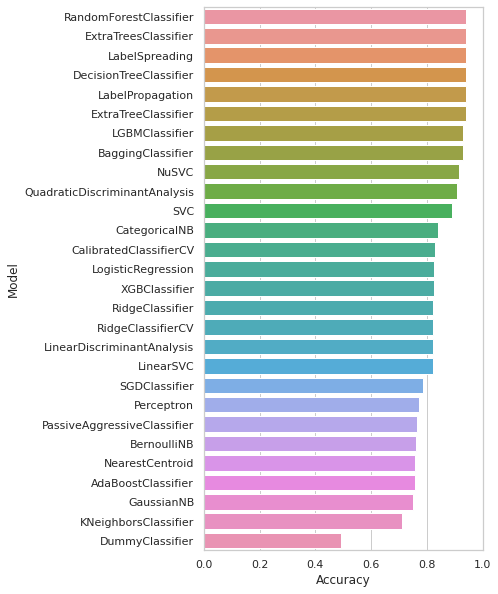

In [64]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

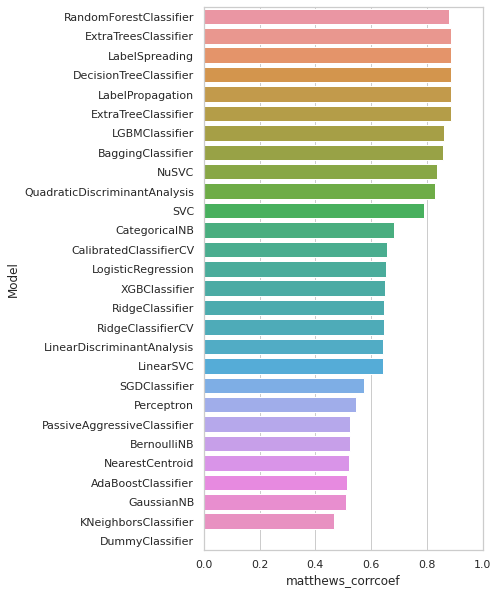

In [65]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="matthews_corrcoef", data=models_train)
ax.set(xlim=(0, 1))

### **Random Forest Classifier**

In [84]:
# Build random forest classifier once it was the best in performance

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [86]:
feature['class']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1417    negative
1418    negative
1419    negative
1420    negative
1421    negative
Name: class, Length: 2759, dtype: object

In [88]:
# Simplest and quickest way to obtain the model performance (Accuracy)
rf.score(X_test,y_test)

0.6871980676328503

In [89]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.6871980676328503

In [71]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.3607553904738121

In [72]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[284, 143],
       [122, 279]])

In [73]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

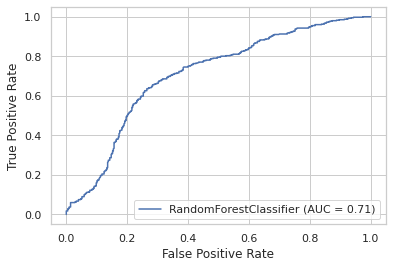

In [74]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_test, y_test)  
plt.show()

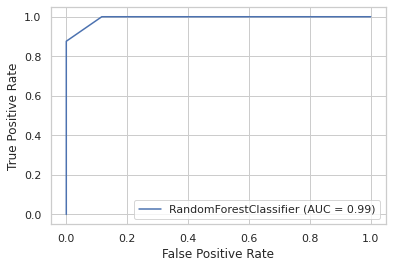

In [75]:
plot_roc_curve(rf, X_train, y_train)  
plt.show()

### **Feature importance**

In [76]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X2

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,DPC1_AM,DPC1_AN,DPC1_AP,DPC1_AQ,DPC1_AR,DPC1_AS,DPC1_AT,DPC1_AV,DPC1_AW,DPC1_AY,DPC1_CA,DPC1_CC,DPC1_CD,DPC1_CE,DPC1_CF,DPC1_CG,DPC1_CH,DPC1_CI,DPC1_CK,DPC1_CL,DPC1_CM,DPC1_CN,DPC1_CP,DPC1_CQ,DPC1_CR,DPC1_CS,DPC1_CT,DPC1_CV,DPC1_CW,DPC1_CY,...,DPC1_VW,DPC1_VY,DPC1_WA,DPC1_WC,DPC1_WD,DPC1_WE,DPC1_WF,DPC1_WG,DPC1_WI,DPC1_WK,DPC1_WL,DPC1_WM,DPC1_WN,DPC1_WP,DPC1_WQ,DPC1_WR,DPC1_WS,DPC1_WT,DPC1_WV,DPC1_WW,DPC1_WY,DPC1_YA,DPC1_YC,DPC1_YD,DPC1_YE,DPC1_YF,DPC1_YG,DPC1_YH,DPC1_YI,DPC1_YK,DPC1_YL,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YY
0,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,10.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,6.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.45,6.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1418,0.00,0.00,0.00,0.00,0.00,3.45,0.00,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1419,0.00,0.00,0.00,0.00,0.00,3.45,0.00,0.00,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.45,0.00,0.00,6.90,0.00,0.00,0.00,0.00,0

In [77]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

,Feature,Gini
0,DPC1_AA,0.01
1,DPC1_AC,0.00
2,DPC1_AD,0.01
3,DPC1_AE,0.00
4,DPC1_AF,0.00
...,...,...
395,DPC1_YY,0.00
396,NaN,0.00
397,NaN,0.00
398,NaN,0.00


Text(0.5, 0, 'Feature Importance')

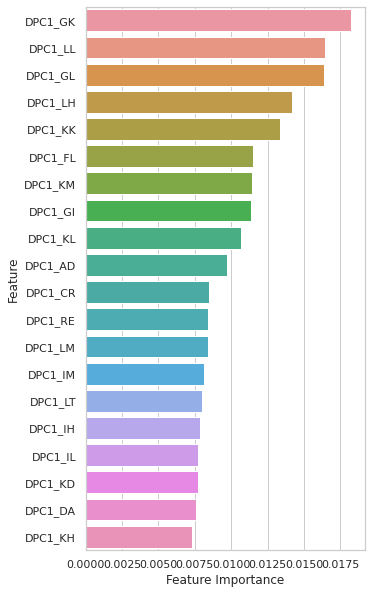

In [78]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")
